# MACHINE LEARNING
# K NEAREST NEIGHBORS
### using train_test_split & gridsearchcv

## DIGITS DATASET

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
from sklearn.datasets import load_digits

In [6]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.score(X_test,y_test)

0.9888888888888889

## 98.8% ACCURATE USING train_test_split

In [37]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0, 40]], dtype=int64)

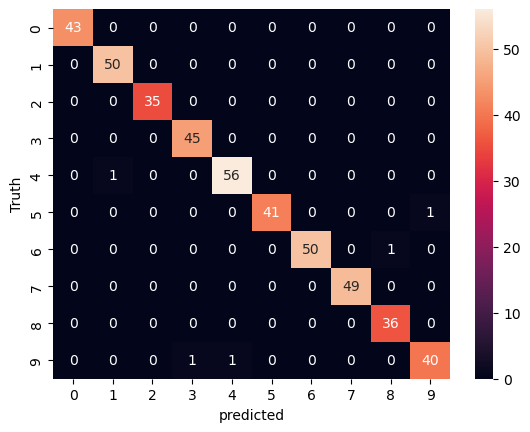

In [41]:
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel('Truth')
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        35
           3       0.98      1.00      0.99        45
           4       0.98      0.98      0.98        57
           5       1.00      0.98      0.99        42
           6       1.00      0.98      0.99        51
           7       1.00      1.00      1.00        49
           8       0.97      1.00      0.99        36
           9       0.98      0.95      0.96        42

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [63]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(KNeighborsClassifier(),{
    "n_neighbors":[2,3,5,10]
},cv=5,return_train_score=False)

In [64]:
clf.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 10]})

In [65]:
clf.cv_results_

{'mean_fit_time': array([0.00080113, 0.00080638, 0.00100236, 0.00059924]),
 'std_fit_time': array([4.00573707e-04, 4.03289221e-04, 7.38312704e-06, 4.89279901e-04]),
 'mean_score_time': array([0.03416519, 0.03378654, 0.03341007, 0.03453875]),
 'std_score_time': array([0.00133789, 0.00099912, 0.00064986, 0.00069497]),
 'param_n_neighbors': masked_array(data=[2, 3, 5, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10}],
 'split0_test_score': array([0.96111111, 0.95555556, 0.94722222, 0.93055556]),
 'split1_test_score': array([0.96666667, 0.95833333, 0.95555556, 0.94722222]),
 'split2_test_score': array([0.96935933, 0.96657382, 0.96657382, 0.96935933]),
 'split3_test_score': array([0.97771588, 0.98607242, 0.98050139, 0.97771588]),
 'split4_test_score': array([0.96100279, 0.96657382, 0.9637883 , 0.94986072]),
 'mean_test_score': array([0.96

In [66]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000801,0.000401,0.034165,0.001338,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
1,0.000806,0.000403,0.033787,0.000999,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
2,0.001002,0.000007,0.033410,0.000650,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,3
3,0.000599,0.000489,0.034539,0.000695,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,4


In [69]:
clf.best_score_

0.9671711544413494

In [71]:
clf.best_params_

{'n_neighbors': 2}

## 96.7% ACCURATE USING GRIDSEARCHCV